Este conjunto de dados fornece informações sobre fatores que influenciam deslizamentos, como precipitação, ângulo de inclinação, propriedades do solo, cobertura vegetal, atividade sísmica e proximidade de fontes de água. Cada linha representa uma observação única relacionada à ocorrência do deslizamento, e as colunas descrevem atributos específicos associados às condições ambientais e geofísicas.



### Colunas
- Chuval_mm: Quantidade total de precipitação medida em milímetros durante um período específico que antecedeu o deslizamento.

- Inclinacao_encosta: Declividade da encosta onde a observação foi registrada, medida em graus.


- Nivel_saturacao: Nível de saturação de água do solo, representado como uma fração (0 a 1).


- Vegetacao: Proporção do solo coberto por vegetação, representada como uma fração (0 a 1).


- Atividade_sismica: Magnitude da atividade sísmica recente na área, medida na escala Richter.


- Proximidade_agua: Distância até o corpo d'água mais próximo, representada como uma fração (0 a 1). Valores mais baixos indicam maior proximidade com a água.


- Deslizamento: Um indicador binário onde 1 representa a ocorrência de um deslizamento e 0 representa a ausência de deslizamento.


- Solo_cascalho: Um indicador binário onde 1 indica o tipo de solo cascalho e 0 indica o contrário.


- Solo_arenoso: Um indicador binário onde 1 indica o tipo de solo arenoso e 0 indica o contrário.


- Solo_siltoso: Um indicador binário onde 1 indica o tipo de solo silte e 0 indica o contrário.


## Tratando e Analisando os Dados

In [ ]:
# Bibiliotecas Usadas
import kagglehub
import os
import numpy as np
import streamlit as st
import time

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Fazendo o download do dataset
path = kagglehub.dataset_download("rajumavinmar/landslide-dataset")

print("Path to dataset files:", path)

# Listando os arquivos no diretório baixado para encontrar o arquivo CSV
files_in_directory = os.listdir(path)
print("Files in the downloaded directory:", files_in_directory)

csv_file_name = 'landslide_dataset.csv'

# Construindo o caminho completo para o arquivo CSV
csv_file_path = os.path.join(path, csv_file_name)

# Lendo o arquivo CSV usando o caminho completo
df = pd.read_csv(csv_file_path)
df.head()

Path to dataset files: /kaggle/input/landslide-dataset
Files in the downloaded directory: ['landslide_dataset.csv']


,Rainfall_mm,Slope_Angle,Soil_Saturation,Vegetation_Cover,Earthquake_Activity,Proximity_to_Water,Landslide,Soil_Type_Gravel,Soil_Type_Sand,Soil_Type_Silt
0,206.181018,58.275001,0.892798,0.339463,4.390047,0.099975,1,0,0,0
1,218.887334,36.679801,0.657147,0.360355,4.141029,0.832443,1,0,0,1
2,181.850867,31.363874,0.673362,0.221697,5.311891,0.023062,1,0,0,1
3,228.716199,38.995134,0.618666,0.489502,4.581928,0.785176,1,0,0,1
4,179.951067,42.998205,0.836966,0.118580,5.518862,0.450499,1,0,0,0


In [ ]:
df.columns

Index(['Rainfall_mm', 'Slope_Angle', 'Soil_Saturation', 'Vegetation_Cover',
       'Earthquake_Activity', 'Proximity_to_Water', 'Landslide',
       'Soil_Type_Gravel', 'Soil_Type_Sand', 'Soil_Type_Silt'],
      dtype='object')

In [ ]:
# Mudando nomes das colunas para portugues

novo_nomes = {'Rainfall_mm': 'Chuva_mm',
              'Slope_Angle': 'Inclinacao_encosta',
              'Soil_Saturation': 'Nivel_saturacao',
              'Vegetation_Cover': 'Vegetacao',
              'Earthquake_Activity': 'Atividade_sismica',
              'Proximity_to_Water': 'Proximidade_agua',
              'Landslide': 'Deslizamento',
              'Soil_Type_Gravel': 'Solo_cascalho',
              'Soil_Type_Sand': 'Solo_arenoso',
              'Soil_Type_Silt': 'Solo_siltoso'
              }
df.rename(columns=novo_nomes,inplace=True)

In [ ]:
print("Primeiras linhas do Data Frame\n")
print(df.head())

Primeiras linhas do Data Frame

     Chuva_mm  Inclinacao_encosta  Nivel_saturacao  Vegetacao  \
0  206.181018           58.275001         0.892798   0.339463   
1  218.887334           36.679801         0.657147   0.360355   
2  181.850867           31.363874         0.673362   0.221697   
3  228.716199           38.995134         0.618666   0.489502   
4  179.951067           42.998205         0.836966   0.118580   

   Atividade_sismica  Proximidade_agua  Deslizamento  Solo_cascalho  \
0           4.390047          0.099975             1              0   
1           4.141029          0.832443             1              0   
2           5.311891          0.023062             1              0   
3           4.581928          0.785176             1              0   
4           5.518862          0.450499             1              0   

   Solo_arenoso  Solo_siltoso  
0             0             0  
1             0             1  
2             0             1  
3             0       

In [ ]:
valores_nulos = df.isnull().sum()
print(f"Valores nulos por coluna: \n {valores_nulos}")

Valores nulos por coluna: 
 Chuva_mm              0
Inclinacao_encosta    0
Nivel_saturacao       0
Vegetacao             0
Atividade_sismica     0
Proximidade_agua      0
Deslizamento          0
Solo_cascalho         0
Solo_arenoso          0
Solo_siltoso          0
dtype: int64


In [ ]:
df = df.drop('Atividade_sismica', axis=1)

In [ ]:
num_linhas, num_colunas = df.shape
print(f"Dimensoes do DataFrame: {num_linhas} linhas  x {num_colunas} colunas \n")

Dimensoes do DataFrame: 2000 linhas  x 9 colunas 



In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chuva_mm            2000 non-null   float64
 1   Inclinacao_encosta  2000 non-null   float64
 2   Nivel_saturacao     2000 non-null   float64
 3   Vegetacao           2000 non-null   float64
 4   Proximidade_agua    2000 non-null   float64
 5   Deslizamento        2000 non-null   int64  
 6   Solo_cascalho       2000 non-null   int64  
 7   Solo_arenoso        2000 non-null   int64  
 8   Solo_siltoso        2000 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 140.8 KB
None


In [ ]:
print(df.describe())

          Chuva_mm  Inclinacao_encosta  Nivel_saturacao    Vegetacao  \
count  2000.000000         2000.000000      2000.000000  2000.000000   
mean    176.688462           29.985404         0.540316     0.522862   
std      65.724685           15.175902         0.295665     0.260426   
min      50.036151            5.003944         0.000652     0.100005   
25%     128.379762           18.018061         0.265634     0.295475   
50%     177.013772           27.772833         0.599887     0.500191   
75%     228.742286           41.683190         0.801994     0.740690   
max     299.919102           59.966732         0.998831     0.999837   

       Proximidade_agua  Deslizamento  Solo_cascalho  Solo_arenoso  \
count       2000.000000   2000.000000     2000.00000     2000.0000   
mean           1.001867      0.500000        0.25850        0.2415   
std            0.579964      0.500125        0.43792        0.4281   
min            0.000653      0.000000        0.00000        0.0000   
2

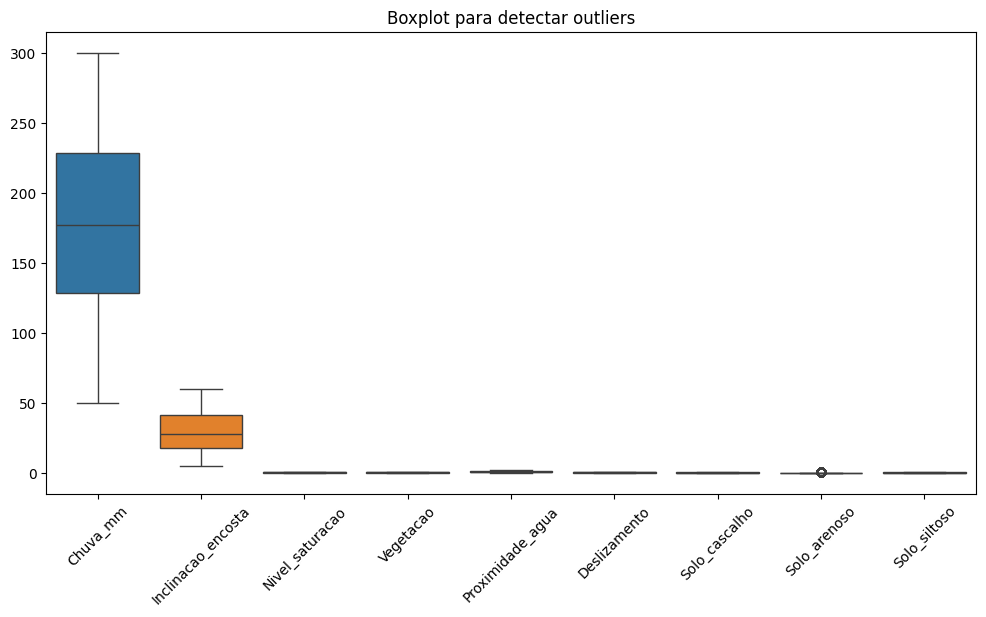

In [ ]:
# Verificar a presença de outliers

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot para detectar outliers")
plt.xticks(rotation=45)
plt.show()

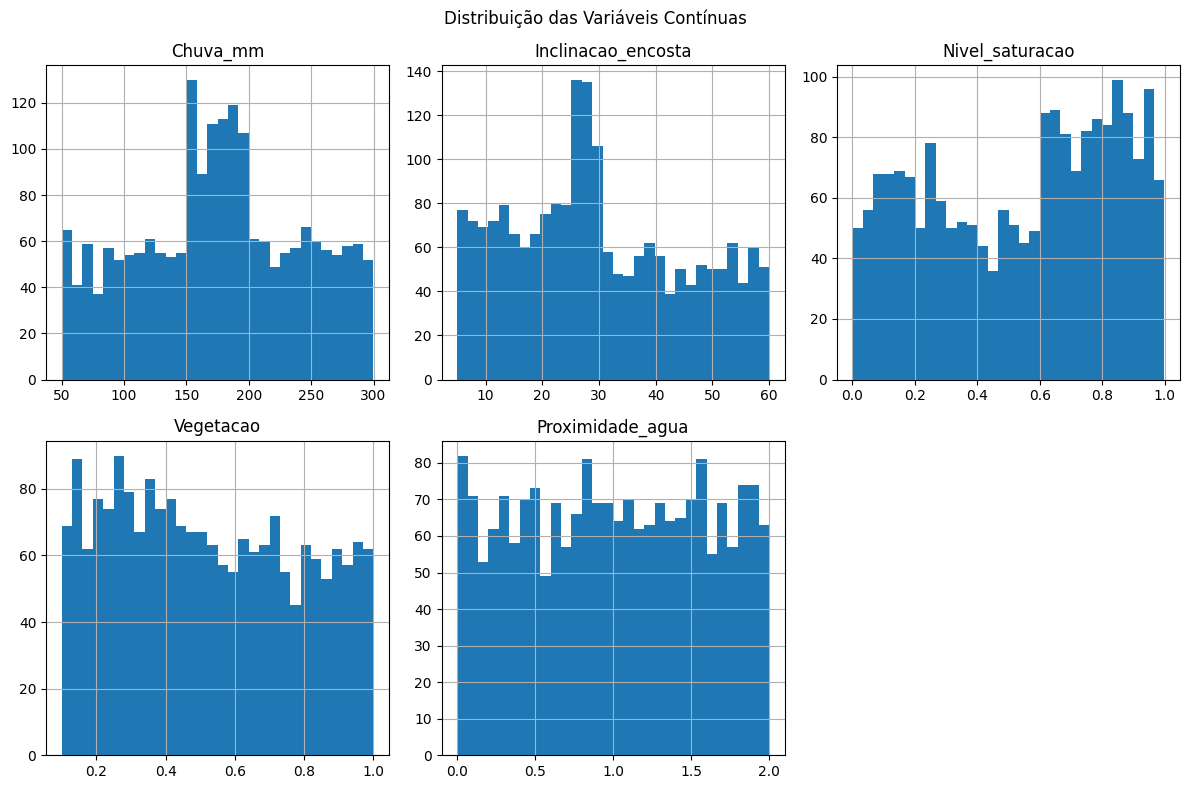

In [ ]:
# Histograma para variáveis contínuas
cont_vars = ['Chuva_mm', 'Inclinacao_encosta', 'Nivel_saturacao',
             'Vegetacao', 'Proximidade_agua']

df[cont_vars].hist(bins=30, figsize=(12, 8), layout=(2, 3))
plt.suptitle("Distribuição das Variáveis Contínuas")
plt.tight_layout()
plt.show()

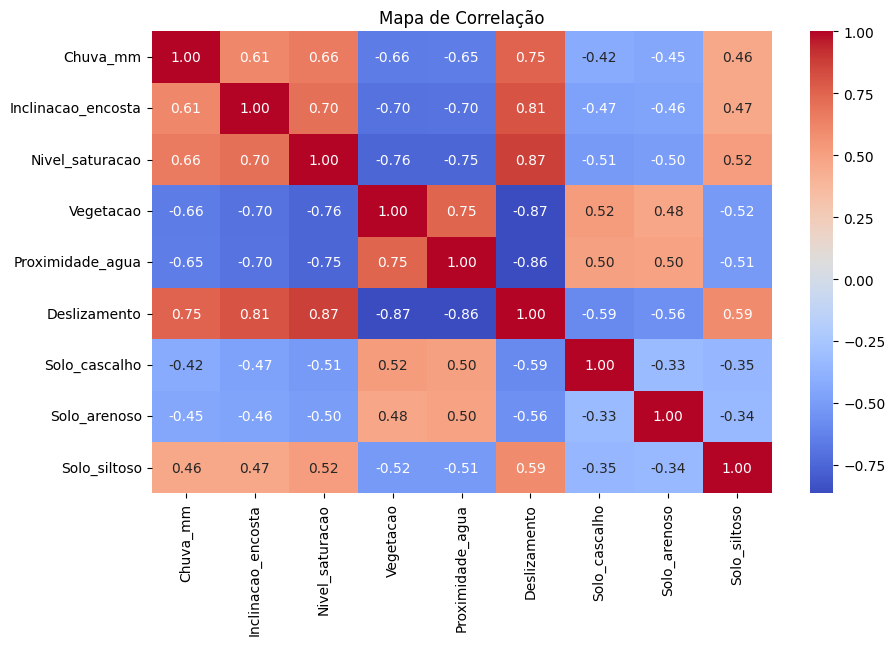

In [ ]:
# Mapa de calor das correlações
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlação')
plt.show()

In [ ]:
df.corr()

,Chuva_mm,Inclinacao_encosta,Nivel_saturacao,Vegetacao,Proximidade_agua,Deslizamento,Solo_cascalho,Solo_arenoso,Solo_siltoso
Chuva_mm,1.000000,0.607002,0.659859,-0.657764,-0.651956,0.754504,-0.423365,-0.448368,0.462550
Inclinacao_encosta,0.607002,1.000000,0.701269,-0.700543,-0.695133,0.808590,-0.472609,-0.461181,0.467144
Nivel_saturacao,0.659859,0.701269,1.000000,-0.755881,-0.752115,0.872298,-0.509187,-0.498191,0.517298
Vegetacao,-0.657764,-0.700543,-0.755881,1.000000,0.750491,-0.865254,0.523588,0.475229,-0.515497
Proximidade_agua,-0.651956,-0.695133,-0.752115,0.750491,1.000000,-0.864131,0.501977,0.496025,-0.510184
Deslizamento,0.754504,0.808590,0.872298,-0.865254,-0.864131,1.000000,-0.590439,-0.564262,0.594289
Solo_cascalho,-0.423365,-0.472609,-0.509187,0.523588,0.501977,-0.590439,1.000000,-0.333162,-0.350891
Solo_arenoso,-0.448368,-0.461181,-0.498191,0.475229,0.496025,-0.564262,-0.333162,1.000000,-0.335335
Solo_siltoso,0.462550,0.467144,0.517298,-0.515497,-0.510184,0.594289,-0.350891,-0.335335,1.000000


## Modelo de predição de Risco de deslizamento

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features para o modelo
X = df.drop(columns=['Deslizamento'])
y = df['Deslizamento']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo simples
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))


R²: 0.99959998999975
RMSE: 0.00010000000000000002


## Salvando os Modelos

In [ ]:
import joblib
joblib.dump(model, 'modelo_risco_deslizamento.pkl')

['modelo_risco_deslizamento.pkl']

In [ ]:

from sklearn.ensemble import RandomForestRegressor
import joblib
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

modelo = RandomForestRegressor()
modelo.fit(X_scaled, y)

joblib.dump(scaler, "scaler_risco.pkl")


['scaler_risco.pkl']